<a href="https://colab.research.google.com/github/tobias-hoepfl/Digital-Organizations-SE/blob/main/learning_portfolio/7_sentence_BERT_Hoepfl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theoretical part

## Sentence-BERT

- As we have talked about in the session, another approach to NLP are embeddings
- Sentence-BERT (SBERT) is a framework for generating sentence embeddings (https://sbert.net/)
- It is based on the BERT (Bidirectional Encoder Representations from Transformers) architecture.
- SBERT treats sentences as a whole and generates embeddings that capture the semantic meaning and context of the entire sentence
- They can be used for text classification, information retrieval, clustering, semantic search, and other NLP tasks
- The SentenceTransformer library provides an interface for applying the SBERT framework

## Sentence/Word embeddings
- I also watched the following video: Vectoring Words (Word Embeddings) - Computerphile  https://www.youtube.com/watch?v=gQddtTdmG_8
- Here it is about word embeddings, but the intuition is similar and explained in a very good way

## Cosine similarity

- Cosine similarity is a metric used to measure the similarity between two vectors. It calculates the cosine of the angle between the vectors, providing a value between -1 and 1 (https://en.wikipedia.org/wiki/Cosine_similarity)
- In the context of Sentence-BERT, cosine similarity is used to compare the semantic similarity between pairs of sentences. Higher scores indicate greater similarity, while scores close to 0 indicate little similarity, and negative scores indicate dissimilarity or opposite meanings
- Cosine similarity with SBERT embeddings enables tasks like sentence similarity, semantic search, and text classification

Compare the following graph for an intuition:

(Source: https://medium.com/geekculture/cosine-similarity-and-cosine-distance-48eed889a5c4)

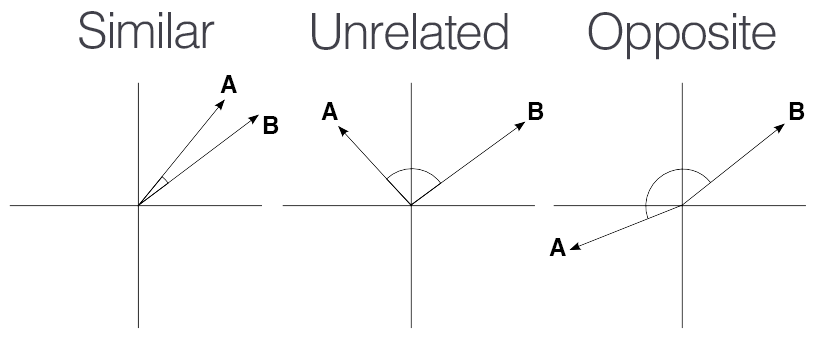

#Practical part

## Getting used to sentence BERT
refer to https://sbert.net/docs/quickstart.html as the main introduction I used

In [37]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

#Our sentences we like to encode

#Sentence 1 and 2 are related to computer science
#Sentence 3 and 4 are related to animals
#Given that, I want to detect a bigger similarity between 1 and 2 (3 and 4) respectively

sentences = ['I like machine learning',
    'Computer science is difficult.',
    'Cats and dogs are animals.',
    'Today I saw goats on my walk.'
    ]

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#the result is a two dimensional numpy array with the embeddings for each of the four sentences
#embeddings = numerical representation from a neural network layerthat is supposed to capture the meaning
embeddings

array([[-0.02734647,  0.10783725, -0.04654178, ...,  0.06610765,
         0.00882122, -0.02950926],
       [ 0.03908582,  0.01036369, -0.05991037, ..., -0.0125692 ,
         0.05681446, -0.0392001 ],
       [ 0.03332185,  0.12472118, -0.03504993, ...,  0.04088782,
         0.07677301, -0.00328685],
       [-0.02785524,  0.0467772 , -0.03553182, ...,  0.06849615,
         0.01237352, -0.02208631]], dtype=float32)

In [40]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between embeddings
similarity_matrix = cosine_similarity(embeddings)

# Print the cosine similarity matrix
for i in range(len(sentences)):
    for j in range(len(sentences)):
        print('Similarity between "', sentences[i], '" and "', sentences[j], '": ',
              similarity_matrix[i][j], sep = '')
    print("")

#As expected Similarity is highest between sentence 1 and sentence 2 (sentence 3 and sentence 4)

Similarity between "I like machine learning" and "I like machine learning": 0.99999994
Similarity between "I like machine learning" and "Computer science is difficult.": 0.30784374
Similarity between "I like machine learning" and "Cats and dogs are animals.": 0.19056791
Similarity between "I like machine learning" and "Today I saw goats on my walk.": 0.08702095

Similarity between "Computer science is difficult." and "I like machine learning": 0.30784374
Similarity between "Computer science is difficult." and "Computer science is difficult.": 1.0000001
Similarity between "Computer science is difficult." and "Cats and dogs are animals.": 0.2011168
Similarity between "Computer science is difficult." and "Today I saw goats on my walk.": -0.055827186

Similarity between "Cats and dogs are animals." and "I like machine learning": 0.19056791
Similarity between "Cats and dogs are animals." and "Computer science is difficult.": 0.2011168
Similarity between "Cats and dogs are animals." and "Cat

## Real example

Next I want to apply the same approach to a real-life classification problem which is classifying e-commerce descriptions to four different categories ("Electronics", "Household", "Books" and "Clothing & Accessories")

<br>


**Source:**

https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

<br>

**About Dataset:**

This is the classification based E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

The dataset is in ".csv" format with two columns - the first column is the class name and the second one is the datapoint of that class. The data point is the product and description from the e-commerce website.

<br>

**Features:**

Data Set Characteristics: Multivariate

Number of Instances: 50425

Number of classes: 4
Area: Computer science
Attribute Characteristics: Real
Number of Attributes: 1
Associated Tasks: Classification
Missing Values? No

Gautam. (2019). E commerce text dataset (version - 2) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.3355823

In [41]:
#set drive connection
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df = pd.read_csv("/content/drive/MyDrive/DigitalOrganizations/ecommerceDataset.csv", sep=',', header = None)

In [43]:
df.head()

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [44]:
#include column names
df.rename( columns={0:'Category'}, inplace=True )
df.rename( columns={1:'Description'}, inplace=True )

In [45]:
#check our changes
df.head()

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


<Axes: ylabel='Category'>

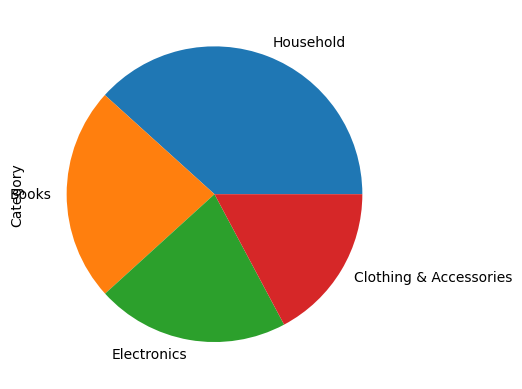

In [46]:
df['Category'].value_counts().plot.pie()
#We can see that there is not an equal distribution in the data

In [47]:
#finally shuffle the data frame and take a subset of 5000 rows to make computation faster
df = df.sample(frac = 1)
df = df[:5000]

In [48]:
#now split into test and train data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [49]:
print(len(test.index))
print(len(train.index))

1000
4000


<Axes: ylabel='Category'>

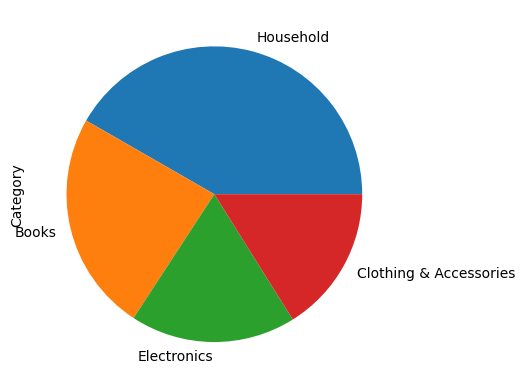

In [50]:
#distribution in test is similar
test['Category'].value_counts().plot.pie()

## Try for specific columns

In order to get a feeling whether the approach would work in general, let's take two examples for the two categories

In [51]:
house_test_string_1 = train[train['Category'] == 'Household'].iloc[0,1]

In [52]:
house_test_string_2 = train[train['Category'] == 'Household'].iloc[1,1]

In [53]:
elec_test_string_1 = train[train['Category'] == 'Electronics'].iloc[0,1]

In [54]:
elec_test_string_2 = train[train['Category'] == 'Electronics'].iloc[1,1]

In [55]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

#Our sentences we like to encode
sentences = [house_test_string_1, house_test_string_2, elec_test_string_1, elec_test_string_2]

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between embeddings
similarity_matrix = cosine_similarity(embeddings)

# Print the cosine similarity matrix
for i in range(len(sentences)):
    for j in range(len(sentences)):
        print("Similarity between sentence", i+1, "and sentence", j+1, ":",
              similarity_matrix[i][j])
    print("")

Similarity between sentence 1 and sentence 1 : 0.9999998
Similarity between sentence 1 and sentence 2 : 0.23106827
Similarity between sentence 1 and sentence 3 : 0.21114597
Similarity between sentence 1 and sentence 4 : 0.18110901

Similarity between sentence 2 and sentence 1 : 0.23106827
Similarity between sentence 2 and sentence 2 : 0.9999997
Similarity between sentence 2 and sentence 3 : 0.12523694
Similarity between sentence 2 and sentence 4 : 0.3449684

Similarity between sentence 3 and sentence 1 : 0.21114597
Similarity between sentence 3 and sentence 2 : 0.12523694
Similarity between sentence 3 and sentence 3 : 1.0000002
Similarity between sentence 3 and sentence 4 : 0.20672765

Similarity between sentence 4 and sentence 1 : 0.18110901
Similarity between sentence 4 and sentence 2 : 0.3449684
Similarity between sentence 4 and sentence 3 : 0.20672765
Similarity between sentence 4 and sentence 4 : 1.0000002



- Similarity is highest for sentence 1 and 2 (3 and 4)
- The most accurate approach would be to take the category with the highest average cosine similarity from the known data (i.e. train set)
- Given the success of this short example, maybe it would be sufficient though just to consider the cosine similarity to a smaller subset of data

In [56]:
sentences

['High Quality Plastic Funnel 8cm Dia with 7.5 cm Long Stem Pack of 2 High Quality Plastic Funnel 8cm Dia with 7.5 CM Long Stem Pack of 2',
 "Shopais Triple Line Acrylic Hanger Plastic Ring Hanger For Scarf, Shawl, Tie, Belt, Closet Accessory Wardrobe Organizer (Assorted Color) The scarf n tie hanger has been smartly designed to organize your closet to round up all those dangling scarves, ties,stoles, dupattas and belts. This scarf hanger is a must-have in every girl's wardrobe. Crafted from high quality plastic, this scarf hanger is very durable. It is designed with fifteen rings for hanging scarves and other accessories from delicate to bulky all in your wardrobe. There is no mounting hardware that is required.",
 'AmazonBasics Male to Female Stereo Audio Cable (Aux Extension Cable) - 6 Feet (3.5mm) Size name:6 Feet   AmazonBasics Male to Female Stereo Audio Cable (AUX Extension Cable) - 6 Feet (3.5mm)',
 'TheCoolio Safe Dot Reflector / Safety Jackets (Plain Orange) - Regular Pattern

In [57]:
#the model chosen is a good allround model according to the description on sbert.net
model = SentenceTransformer('all-mpnet-base-v2')

import torch

train_embeddings = model.encode(train['Description'].tolist())
train_labels = (train['Category']).tolist()

test_embeddings = (model.encode(test['Description'].tolist()))
test_labels = (test['Category']).tolist()

In [58]:
train_embeddings

array([[-0.03793925, -0.0111462 , -0.02684532, ...,  0.03521864,
        -0.04069863, -0.02809359],
       [-0.01523515, -0.0468755 ,  0.0041202 , ..., -0.01885694,
         0.00369258, -0.04085377],
       [-0.01521657, -0.00017662,  0.00078983, ...,  0.0663554 ,
        -0.04688747, -0.01618091],
       ...,
       [ 0.00413602, -0.08193709, -0.01575876, ..., -0.00107274,
        -0.02747573, -0.02200157],
       [ 0.03246722, -0.14098704,  0.00742328, ..., -0.00509638,
        -0.01752433, -0.02978329],
       [ 0.00269796,  0.00061756, -0.02594917, ...,  0.02529548,
        -0.00727903, -0.03536266]], dtype=float32)

In [59]:
#reset index, because otherwise iteration does not work
test = test.reset_index(drop=True)

In [60]:
#Some data wrangling

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import statistics

def calculate_average_cosine_similarity(category, index):
  # Boolean filter for "Books" category
  category_filter = train['Category'] == category
  filtered_embeddings = train_embeddings[category_filter]


  test_embedding = test_embeddings[index]

  # Convert train_embeddings list to a 2D array
  train_embeddings_2d = np.array(filtered_embeddings)


  #Reshape test_embedding to have two dimensions
  test_embedding_2d = test_embedding.reshape(1, -1)

  #Perform cosine similarity calculation
  similarity = cosine_similarity(test_embedding_2d, train_embeddings_2d)[0]

  mean = statistics.mean(similarity)

  return mean

In [61]:
print(calculate_average_cosine_similarity('Books', 1))
print(calculate_average_cosine_similarity('Household', 1))
print(calculate_average_cosine_similarity('Electronics', 1))
print(calculate_average_cosine_similarity('Clothing & Accessories', 1))

0.1706302
0.07408844
0.10060691
0.07149199


In [62]:
def predict(index):
  categories = ['Books', 'Household', 'Electronics', 'Clothing & Accessories']
  max = -10000000
  max_category = 'None'
  for category in categories:
    score = calculate_average_cosine_similarity(category, index)
    if score > max:
      max = score
      max_category = category
  return max_category

In [63]:
#Data is small, therefore we can use for loops
correct_predictions = 0
wrong_predictions = 0
wrong_pred_categories = []
wrong_pred_targets = []

for i in range(len(test)):
  prediction = predict(i)
  target = test.loc[i, 'Category']
  if prediction == target:
    correct_predictions += 1
  else:
    wrong_predictions += 1
    wrong_pred_categories.append(prediction)
    wrong_pred_targets.append(target)


print('Correct:', correct_predictions)
print('Wrong:', wrong_predictions)
print('Accuracy:', correct_predictions/(wrong_predictions+correct_predictions))

Correct: 853
Wrong: 147
Accuracy: 0.853


Let's see if some categories are overproportionally predicted wrongly

<Axes: ylabel='Category'>

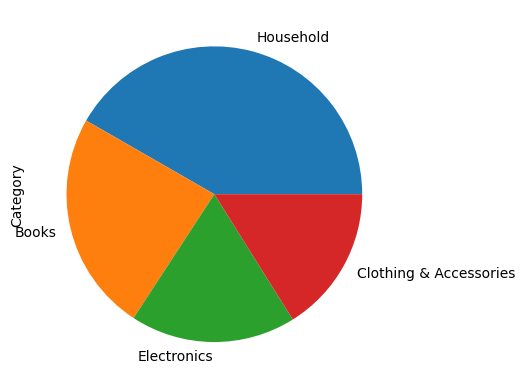

In [64]:
#Total occurence in test data
test['Category'].value_counts().plot.pie()

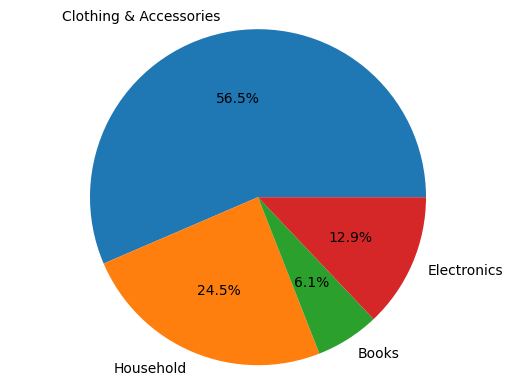

In [65]:
#plot occurence of wrongly predicted categories

import matplotlib.pyplot as plt

category_counts = {}
for category in wrong_pred_categories:
    category_counts[category] = category_counts.get(category, 0) + 1

# Create a pie plot
labels = category_counts.keys()
counts = category_counts.values()

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

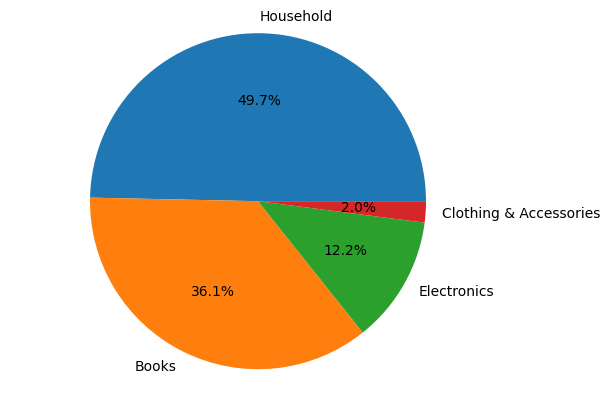

In [66]:
#plot occurence of actual target categories

import matplotlib.pyplot as plt

category_counts = {}
for category in wrong_pred_targets:
    category_counts[category] = category_counts.get(category, 0) + 1

# Create a pie plot
labels = category_counts.keys()
counts = category_counts.values()

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [67]:
#source: https://www.geeksforgeeks.org/python-merge-two-lists-into-list-of-tuples/
def merge(list1, list2):

    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]

    return merged_list

In [68]:
merged_list = merge(wrong_pred_categories, wrong_pred_targets)

In [69]:
merged_list

#when listing out pairs of prediction vs. target,
#one sees that particularly often Clothing & Accessories is predicted instead of Household

[('Clothing & Accessories', 'Household'),
 ('Household', 'Books'),
 ('Clothing & Accessories', 'Household'),
 ('Clothing & Accessories', 'Electronics'),
 ('Books', 'Household'),
 ('Clothing & Accessories', 'Household'),
 ('Clothing & Accessories', 'Household'),
 ('Books', 'Household'),
 ('Clothing & Accessories', 'Books'),
 ('Clothing & Accessories', 'Books'),
 ('Books', 'Household'),
 ('Clothing & Accessories', 'Household'),
 ('Clothing & Accessories', 'Household'),
 ('Clothing & Accessories', 'Household'),
 ('Clothing & Accessories', 'Electronics'),
 ('Clothing & Accessories', 'Household'),
 ('Household', 'Electronics'),
 ('Clothing & Accessories', 'Household'),
 ('Household', 'Books'),
 ('Household', 'Books'),
 ('Clothing & Accessories', 'Household'),
 ('Clothing & Accessories', 'Books'),
 ('Clothing & Accessories', 'Household'),
 ('Electronics', 'Household'),
 ('Household', 'Books'),
 ('Clothing & Accessories', 'Household'),
 ('Books', 'Clothing & Accessories'),
 ('Clothing & Acces

## Overall takeaway

- Accuracy is 85.3% which is quite good

- Further analysis should take into account why Clothing & Accessories is predicted too often, while Household is predicted too rarely. Maybe those categories are in part ambiguous